In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

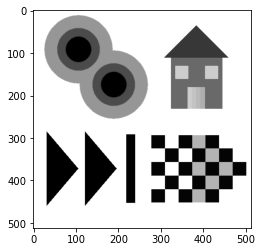

In [2]:
Io = cv2.imread('edgetest_22.png',0)#1.1.1
#plt.imshow(Io, cmap='gray')

Io = Io.astype(np.float)/255
plt.imshow(Io, cmap='gray')
#type(Io)
#Io

# 1.1.2

C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


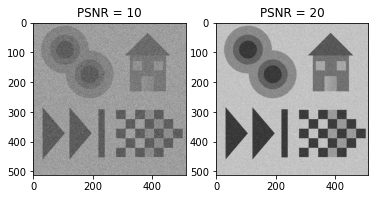

In [3]:
Imax = np.amax(Io)
Imin = np.amin(Io)
an1 = 20/20 #gia psnr=20
an2 = 10/20 #gia psnr=10
mean = 0

sigma1 = (Imax-Imin)/(10 ** an1)#i)
sigma2 = (Imax-Imin)/(10 ** an2)#ii)

row,col = Io.shape

gaussn1 = np.random.normal(mean,sigma1,(row,col))
gaussn2 = np.random.normal(mean,sigma2,(row,col))

In1 = Io + gaussn1
In2 = Io + gaussn2

plt.subplot(1,2,1)
plt.imshow(cv2.imread('edgetest_22.png'))
plt.title('Αρχική Εικόνα')
plt.subplot(1,2,2)
plt.imshow(Io,cmap='gray')
plt.title('Γκρίζα Εικόνα')
plt.savefig('p1_1a.jpg')

plt.subplot(1,2,1)
plt.imshow(In2, cmap='gray')
plt.title('PSNR = 10')
plt.subplot(1,2,2)
plt.imshow(In1, cmap='gray')
plt.title('PSNR = 20')
plt.savefig('p1_1b.jpg')

# Edge Detect

In [4]:
kernelB = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
    ], dtype=np.uint8)
    
def EdgeDetect(Img, sigma, theta_edge, Laplace_type):
#1.2.1    
    n = int(2*np.ceil(3*sigma)+1)
    
    gauss1D = cv2.getGaussianKernel(n, sigma)
    gauss2D = gauss1D @ gauss1D.T#i)
    
    x, y = np.meshgrid(np.linspace(1,n,n),np.linspace(1,n,n))
    
    r = np.sqrt(x**2 + y**2)
    
    log = (np.exp((-r**2)/2*sigma**2))*(2-r**2/sigma**2)*2*np.pi*sigma**4 #ii)
        
#1.2.2 
    Isigma = cv2.filter2D(Img,-1,gauss2D)
    
    if Laplace_type == 'Linear' :
        
        Laplace = cv2.filter2D(Img,-1,log)
    
    elif Laplace_type == 'Non_Linear' :
        
        Laplace = cv2.dilate( Isigma, kernelB) + cv2.erode( Isigma, kernelB) - 2*Isigma
            
#1.2.3
#a)
    Laplace[Laplace>=0]=1
    Laplace[Laplace<0]=0
    
#b)
    Y = cv2.morphologyEx( Laplace, cv2.MORPH_GRADIENT, kernelB)
    
#1.2.4
    Grx, Gry = np.gradient( Isigma)

    norm_grad = np.absolute(Grx) + np.absolute(Gry)
    max_grad = np.max(norm_grad)
    
    D = Y==1 & np.greater(norm_grad, theta_edge * max_grad)
    
    return D

C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


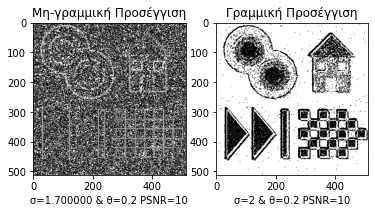

In [5]:
sigma1 = 2
sigma2 = 1.3
sigma3 = 1.7
sigma4 = 2

theta_edge_r = 0.2

D1 = EdgeDetect(In1, sigma1, theta_edge_r, 'Non_Linear') #PSNR=20
D2 = EdgeDetect(In1, sigma2, theta_edge_r, 'Linear')
D3 = EdgeDetect(In2, sigma3, theta_edge_r, 'Non_Linear') #PSNR=10
D4 = EdgeDetect(In2, sigma4, theta_edge_r, 'Linear')

plt.subplot(1,2,1)
plt.imshow(D1,cmap='gray')
plt.xlabel('σ=%d & θ=0.2 PSNR=20'%sigma1)
plt.title('Μη-γραμμική Προσέγγιση')
plt.subplot(1,2,2)
plt.imshow(D2,cmap='gray')
plt.xlabel('σ=%f & θ=0.2 PSNR=20'%sigma2)
plt.title('Γραμμική Προσέγγιση')
plt.savefig('p1_33a.jpg')

plt.subplot(1,2,1)
plt.imshow(D3,cmap='gray')
plt.xlabel('σ=%f & θ=0.2 PSNR=10'%sigma3)
plt.title('Μη-γραμμική Προσέγγιση')
plt.subplot(1,2,2)
plt.imshow(D4,cmap='gray')
plt.xlabel('σ=%d & θ=0.2 PSNR=10'%sigma4)
plt.title('Γραμμική Προσέγγιση')
plt.savefig('p1_33b.jpg')

C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


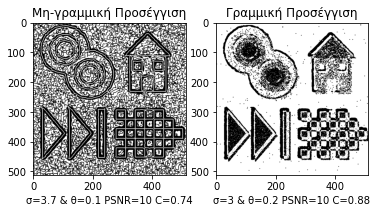

In [6]:
D5 = EdgeDetect(In1, 1.9, 0.3, 'Non_Linear')
D6 = EdgeDetect(In1, 2, 0.15, 'Linear')
D7 = EdgeDetect(In2, 3.7, 0.1, 'Non_Linear')
D8 = EdgeDetect(In2, 3, 0.2, 'Linear')

plt.subplot(1,2,1)
plt.imshow(D5,cmap='gray')
plt.xlabel('σ=1.9 & θ=0.3 PSNR=20 C=0.7')
plt.title('Μη-γραμμική Προσέγγιση')
plt.subplot(1,2,2)
plt.imshow(D6,cmap='gray')
plt.xlabel('σ=2 & θ=0.15 PSNR=20 C=0.88')
plt.title('Γραμμική Προσέγγιση')
plt.savefig('p1_33d.jpg')

plt.subplot(1,2,1)
plt.imshow(D7,cmap='gray')
plt.xlabel('σ=3.7 & θ=0.1 PSNR=10 C=0.74')
plt.title('Μη-γραμμική Προσέγγιση')
plt.subplot(1,2,2)
plt.imshow(D8,cmap='gray')
plt.xlabel('σ=3 & θ=0.2 PSNR=10 C=0.88')
plt.title('Γραμμική Προσέγγιση')
plt.savefig('p1_33c.jpg')

In [7]:
#1.3
def edge_review(Io, D):
    M = cv2.morphologyEx( Io, cv2.MORPH_GRADIENT, kernelB)

    #katofliopoihsh
    _, T = cv2.threshold(M,0.1,1,cv2.THRESH_BINARY) 

    D_T = D*T
    T_D = T*D

    Pr_D_T = np.sum(D_T) / np.sum(T)
    Pr_T_D = np.sum(T_D) / np.sum(D)
    
    C = (Pr_D_T + Pr_T_D) / 2

    return  C,M

C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


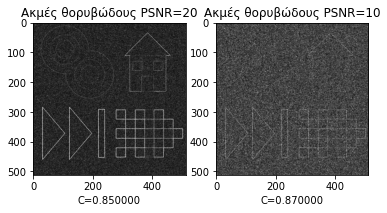

In [38]:
_,m1=edge_review(Io,D8)
c12,m2=edge_review(In1,D8)
c13,m3=edge_review(In2,D8)

plt.subplot(1,2,1)
plt.imshow(Io,cmap='gray')
plt.title('Αρχική Εικόνα')
plt.subplot(1,2,2)
plt.imshow(m1,cmap='gray')
plt.title('Πραγματικές Ακμές')
plt.savefig('p1_33ε.jpg')

plt.subplot(1,2,1)
plt.imshow(m2,cmap='gray')
plt.title('Ακμές θορυβώδους PSNR=20')
plt.xlabel('C=%f'%round(c12,2))
plt.subplot(1,2,2)
plt.imshow(m3,cmap='gray')
plt.title('Ακμές θορυβώδους PSNR=10')
plt.xlabel('C=%f'%round(c13,2))
plt.savefig('p1_33φ.jpg')

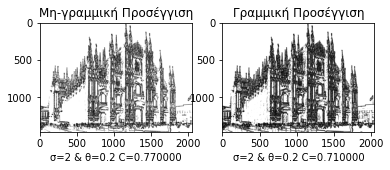

In [48]:
Real_img = cv2.imread('duomo_edges.jpg', 0)
#Real_img = Real_img.astype(np.float)/255
D9 = EdgeDetect(Real_img, 2, 0.15, 'Non_Linear')
D10 = EdgeDetect(Real_img, 2, 0.1, 'Linear')

c1,_ = edge_review(Real_img,D9)
c2,_ = edge_review(Real_img,D10)

plt.subplot(1,2,1)
plt.imshow(D9,cmap='gray')
plt.xlabel('σ=2 & θ=0.2 C=%f'% round(c1,2))
plt.title('Μη-γραμμική Προσέγγιση')
plt.subplot(1,2,2)
plt.imshow(D10,cmap='gray')
plt.xlabel('σ=2 & θ=0.2 C=%f'% round(c2,2))
plt.title('Γραμμική Προσέγγιση')
plt.savefig('p1_4a.jpg')

C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\stefk\.conda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


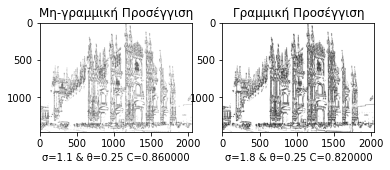

In [49]:
D11 = EdgeDetect(Real_img, 1.9, 0.3, 'Non_Linear')
D12 = EdgeDetect(Real_img, 2.1, 0.23, 'Linear')
D13 = EdgeDetect(Real_img, 1.1, 0.25, 'Non_Linear')
D14 = EdgeDetect(Real_img, 1.8, 0.2, 'Linear')

c3,_ = edge_review(Real_img,D11)
c4,_ = edge_review(Real_img,D12)
c5,_ = edge_review(Real_img,D13)
c6,_ = edge_review(Real_img,D14)

plt.subplot(1,2,1)
plt.imshow(D11,cmap='gray')
plt.xlabel('σ=1.9 & θ=0.3 C=%f'% round(c3,2))
plt.title('Μη-γραμμική Προσέγγιση')
plt.subplot(1,2,2)
plt.imshow(D12,cmap='gray')
plt.xlabel('σ=2.1 & θ=0.23 C=%f'% round(c4,2))
plt.title('Γραμμική Προσέγγιση')
plt.savefig('p1_4b.jpg')

plt.subplot(1,2,1)
plt.imshow(D13,cmap='gray')
plt.xlabel('σ=1.1 & θ=0.25 C=%f'% round(c5,2))
plt.title('Μη-γραμμική Προσέγγιση')
plt.subplot(1,2,2)
plt.imshow(D14,cmap='gray')
plt.xlabel('σ=1.8 & θ=0.25 C=%f'% round(c6,2))
plt.title('Γραμμική Προσέγγιση')
plt.savefig('p1_4c.jpg')